In [69]:
import numpy as np
import pandas as pd
from IPython.display import display
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib

In [70]:
Ha2eV = 27.211396132            # Ha to eV
b2A = 0.529177249               # bohr to Angstrom
Hapb2eVpA = 51.42208619083232   # Ha/bohr to eV/Angstrom

In [71]:
df = pd.read_csv('DFT_vs_FFMM94.csv')

In [72]:
df["LUMO-HOMO"] = df["LUMO (ev)"] - df["HOMO (eV)"]
df

Energy (eV)  Force Norm (Hartree/Bohr) Geometry optisimed Method  \
0   -132.592369                   0.000433                    BigDFT   
1   -132.587093                   0.112404                    MMFF94   
2   -119.384632                   0.000192                    BigDFT   
3   -119.380990                   0.094962                    MMFF94   
4   -125.423675                   0.003320                    BigDFT   
5   -125.419616                   0.100479                    MMFF94   
6   -190.185366                   0.004359                    BigDFT   
7   -190.182191                   0.041024                    MMFF94   
8   -190.224238                   0.009767                    BigDFT   
9   -190.217806                   0.045640                    MMFF94   
10  -115.243518                   0.027068                    BigDFT   
11  -115.244826                   0.059654                    MMFF94   
12  -238.000407                   0.016762                    BigDFT   
13  -237.988484                   0.066985                    MMFF94   
14  -116.154707                   0.038287                    BigDFT   
15  -116.153393                   0.065578                    MMFF94   
16  -130.847715                   0.001166                    BigDFT   
17  -130.845350                   0.059228                    MMFF94   
18  -122.595016                   0.003098                    BigDFT   
19  -122.593063                   0.054446                    MMFF94   
20  -195.921605                   0.004530                    BigDFT   
21  -195.918617                   0.049269                    MMFF94   
22  -110.257552                   0.000575                    BigDFT   
23  -110.255618                   0.029393                    MMFF94   
24  -181.235886                   0.002522                    BigDFT   
25  -181.225573                   0.067476                    MMFF94   
26  -141.034438                   0.001034                    BigDFT   
27  -143.889830                   0.078844                    MMFF94   
28  -166.623182                   0.001244                    BigDFT   
29  -166.609515                   0.077307                    MMFF94   
30  -136.642222                   0.001150                    BigDFT   
31  -139.398779                   0.052497                    MMFF94   

    HOMO (eV)  LUMO (ev)      molecule  LUMO-HOMO  
0   -5.592629  -3.491852         2CzPN   2.100777  
1   -5.562265  -3.419561         2CzPN   2.142704  
2   -4.971823  -2.471990           CBP   2.499833  
3   -4.998088  -2.054175           CBP   2.943913  
4   -5.231339  -2.964533         Cz2BP   2.266806  
5   -5.214511  -2.906044         Cz2BP   2.308467  
6   -3.967124  -2.264732        GOBVUP   1.702392  
7   -3.955886  -2.220191        GOBVUP   1.735695  
8   -4.105403  -2.337207    GOBVUP-mut   1.768196  
9   -3.934581  -2.201492    GOBVUP-mut   1.733089  
10  -4.632581  -2.372337        KAGCAW   2.260244  
11  -4.653345  -2.373704        KAGCAW   2.279641  
12  -4.156928  -2.602422        MOPKEI   1.554506  
13  -4.168184  -2.613421        MOPKEI   1.554763  
14  -5.038252  -1.838882          PhCz   3.199370  
15  -5.021485  -1.874230          PhCz   3.147255  
16  -4.390653  -3.004151       PXZ-TRZ   1.386502  
17  -4.317159  -3.070328       PXZ-TRZ   1.246831  
18  -4.842761  -3.055650        RAPGEV   1.787111  
19  -4.891293  -3.061535        RAPGEV   1.829758  
20  -4.396007  -2.282695        SIFHIY   2.113312  
21  -4.427312  -2.280130        SIFHIY   2.147182  
22  -4.617698  -1.606134           TPA   3.011564  
23  -4.648667  -1.589318           TPA   3.059349  
24  -3.896496  -2.394950        TUFWAS   1.501546  
25  -3.866078  -2.294039        TUFWAS   1.572039  
26  -5.222548  -3.520371      TXO-PhCz   1.702177  
27  -5.218214  -3.504901      TXO-PhCz   1.713313  
28  -5.990571  -4.510670  TXO-PhCz-mut   1.479901  
29  -5.830869  -4.394260  TXO-PhCz-mut   1.436609  
30  -4.812529  

In [73]:
df_BigDFT = df[df["Geometry optisimed Method"] == 'BigDFT'].reset_index()
df_BigDFT

index  Energy (eV)  Force Norm (Hartree/Bohr) Geometry optisimed Method  \
0       0  -132.592369                   0.000433                    BigDFT   
1       2  -119.384632                   0.000192                    BigDFT   
2       4  -125.423675                   0.003320                    BigDFT   
3       6  -190.185366                   0.004359                    BigDFT   
4       8  -190.224238                   0.009767                    BigDFT   
5      10  -115.243518                   0.027068                    BigDFT   
6      12  -238.000407                   0.016762                    BigDFT   
7      14  -116.154707                   0.038287                    BigDFT   
8      16  -130.847715                   0.001166                    BigDFT   
9      18  -122.595016                   0.003098                    BigDFT   
10     20  -195.921605                   0.004530                    BigDFT   
11     22  -110.257552                   0.000575                    BigDFT   
12     24  -181.235886                   0.002522                    BigDFT   
13     26  -141.034438                   0.001034                    BigDFT   
14     28  -166.623182                   0.001244                    BigDFT   
15     30  -136.642222                   0.001150                    BigDFT   

    HOMO (eV)  LUMO (ev)      molecule  LUMO-HOMO  
0   -5.592629  -3.491852         2CzPN   2.100777  
1   -4.971823  -2.471990           CBP   2.499833  
2   -5.231339  -2.964533         Cz2BP   2.266806  
3   -3.967124  -2.264732        GOBVUP   1.702392  
4   -4.105403  -2.337207    GOBVUP-mut   1.768196  
5   -4.632581  -2.372337        KAGCAW   2.260244  
6   -4.156928  -2.602422        MOPKEI   1.554506  
7   -5.038252  -1.838882          PhCz   3.199370  
8   -4.390653  -3.004151       PXZ-TRZ   1.386502  
9   -4.842761  -3.055650        RAPGEV   1.787111  
10  -4.396007  -2.282695        SIFHIY   2.113312  
11  -4.617698  -1.606134           TPA   3.011564  
12  -3.896496  -2.394950        TUFWAS   1.501546  
13  -5.222548  -3.520371      TXO-PhCz   1.702177  
14  -5.990571  -4.510670  TXO-PhCz-mut   1.479901  
15  -4.812529  -3.606739       TXO-TPA   1.205789

In [74]:
df_MMFF94 = df[df["Geometry optisimed Method"] == 'MMFF94'].reset_index()
df_MMFF94

index  Energy (eV)  Force Norm (Hartree/Bohr) Geometry optisimed Method  \
0       1  -132.587093                   0.112404                    MMFF94   
1       3  -119.380990                   0.094962                    MMFF94   
2       5  -125.419616                   0.100479                    MMFF94   
3       7  -190.182191                   0.041024                    MMFF94   
4       9  -190.217806                   0.045640                    MMFF94   
5      11  -115.244826                   0.059654                    MMFF94   
6      13  -237.988484                   0.066985                    MMFF94   
7      15  -116.153393                   0.065578                    MMFF94   
8      17  -130.845350                   0.059228                    MMFF94   
9      19  -122.593063                   0.054446                    MMFF94   
10     21  -195.918617                   0.049269                    MMFF94   
11     23  -110.255618                   0.029393                    MMFF94   
12     25  -181.225573                   0.067476                    MMFF94   
13     27  -143.889830                   0.078844                    MMFF94   
14     29  -166.609515                   0.077307                    MMFF94   
15     31  -139.398779                   0.052497                    MMFF94   

    HOMO (eV)  LUMO (ev)      molecule  LUMO-HOMO  
0   -5.562265  -3.419561         2CzPN   2.142704  
1   -4.998088  -2.054175           CBP   2.943913  
2   -5.214511  -2.906044         Cz2BP   2.308467  
3   -3.955886  -2.220191        GOBVUP   1.735695  
4   -3.934581  -2.201492    GOBVUP-mut   1.733089  
5   -4.653345  -2.373704        KAGCAW   2.279641  
6   -4.168184  -2.613421        MOPKEI   1.554763  
7   -5.021485  -1.874230          PhCz   3.147255  
8   -4.317159  -3.070328       PXZ-TRZ   1.246831  
9   -4.891293  -3.061535        RAPGEV   1.829758  
10  -4.427312  -2.280130        SIFHIY   2.147182  
11  -4.648667  -1.589318           TPA   3.059349  
12  -3.866078  -2.294039        TUFWAS   1.572039  
13  -5.218214  -3.504901      TXO-PhCz   1.713313  
14  -5.830869  -4.394260  TXO-PhCz-mut   1.436609  
15  -4.844501  -3.538314       TXO-TPA   1.306187

In [75]:
new_df = df[df.duplicated('molecule',keep=False)].rename(columns={"Geometry optisimed Method": "Geopt_Method"}).copy()

In [76]:
img_dpi = 300

In [77]:
molecules = [mol for mol in df_MMFF94['molecule']]
color_names = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "brown", "gray", "black", "navy", "teal", "olive", "maroon", "gold", "silver"]

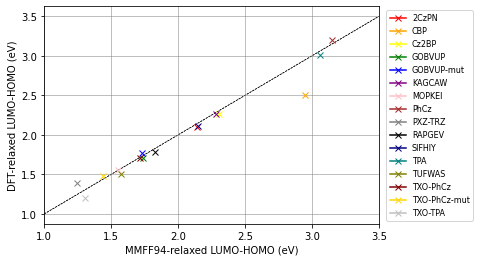

In [78]:
abs_HL_diff = []
for i,mol in enumerate(molecules):
    y = new_df.query("Geopt_Method =='BigDFT'").query("molecule ==@mol")['LUMO-HOMO'].values[0]
    x = new_df.query("Geopt_Method =='MMFF94'").query("molecule ==@mol")['LUMO-HOMO'].values[0]
    abs_HL_diff.append(abs(y-x))
    plt.plot(x,y,marker='x',label=mol,color=color_names[i])

xmin,xmax= ymin,ymax= [1,3.5]

lims = [[xmin,ymin],[xmax,ymax]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")    
    
    
plt.xlim([xmin,xmax])
plt.xlim([ymin,ymax])

plt.ylabel('DFT-relaxed LUMO-HOMO (eV)')
plt.xlabel('MMFF94-relaxed LUMO-HOMO (eV)')

plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 8})
plt.savefig("scatter_DFT_MMFF94_HL.png",dpi=img_dpi)
plt.show()

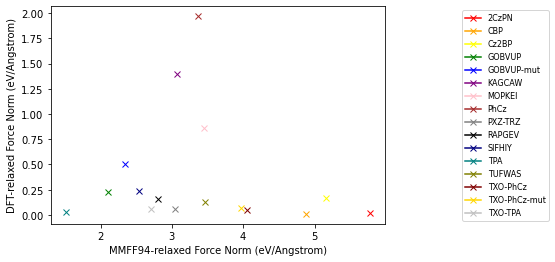

In [79]:
abs_f_diff = []
for i,mol in enumerate(molecules):
    y = new_df.query("Geopt_Method =='BigDFT'").query("molecule ==@mol")['Force Norm (Hartree/Bohr)'].values[0]*Hapb2eVpA
    x = new_df.query("Geopt_Method =='MMFF94'").query("molecule ==@mol")['Force Norm (Hartree/Bohr)'].values[0]*Hapb2eVpA
    abs_f_diff.append(abs(y-x))
    plt.plot(x,y,marker='x',label=mol,color=color_names[i])

plt.ylabel('DFT-relaxed Force Norm (eV/Angstrom)')
plt.xlabel('MMFF94-relaxed Force Norm (eV/Angstrom)')

plt.legend(bbox_to_anchor=(1.5, 1),prop={'size': 8})
plt.savefig("scatter_DFT_MMFF94_F.png",dpi=img_dpi)
plt.show()

-248.000407 -90.255618


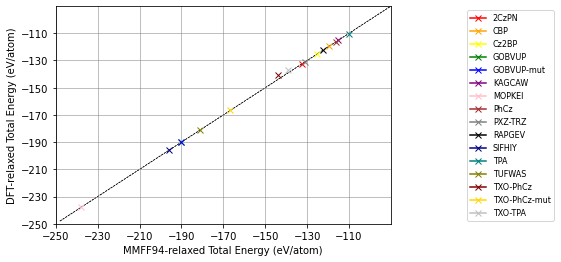

In [80]:
abs_EpA_diff = []
plt.figure()
x_MMFF94 = []
y_BigDFT = []
for i,mol in enumerate(molecules):
    y = new_df.query("Geopt_Method =='BigDFT'").query("molecule ==@mol")['Energy (eV)'].values[0]
    x = new_df.query("Geopt_Method =='MMFF94'").query("molecule ==@mol")['Energy (eV)'].values[0]
    y_BigDFT.append(y)
    x_MMFF94.append(x)
    abs_EpA_diff.append(abs(y-x))
    plt.plot(x,y,marker='x',label=mol,color=color_names[i])

xmin = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-10
xmax = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+20
print(xmin,xmax)
ymin,ymax = xmin,xmax

ymin = xmin
ymax = xmax

lims = [[xmin,ymin],[xmax,ymax]]

plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")    
    
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])

plt.ylabel('DFT-relaxed Total Energy (eV/atom)')
plt.xlabel('MMFF94-relaxed Total Energy (eV/atom)')

plt.xticks(np.arange(xmin-2, xmax, 20))
plt.yticks(np.arange(xmin-2, xmax, 20))

plt.legend(bbox_to_anchor=(1.5, 1),prop={'size': 8})
plt.savefig("scatter_DFT_MMFF94_EvpA.png",dpi=img_dpi)
plt.show()

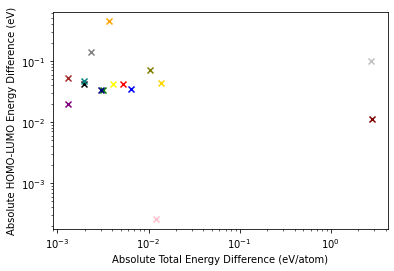

In [81]:
for i,mol in enumerate(molecules):
#     plt.scatter(y=abs_EpA_diff[i],x=abs_HL_diff[i],label=mol,marker='x')
    plt.scatter(x=abs_EpA_diff[i],y=abs_HL_diff[i],label=mol,marker='x',color=color_names[i])
    
# plt.ylabel('Absolute Total Energy Difference (eV/atom)')
# plt.xlabel('Absolute HOMO-LUMO Energy Difference (eV)')
plt.xlabel('Absolute Total Energy Difference (eV/atom)')
plt.ylabel('Absolute HOMO-LUMO Energy Difference (eV)')
plt.xscale('log')
plt.yscale('log')
# plt.legend(bbox_to_anchor=(1.5, 1),prop={'size': 8})
plt.savefig("scatter_DFTvMMFF94_abs_HLvsEvpA.png",dpi=img_dpi)
plt.show()

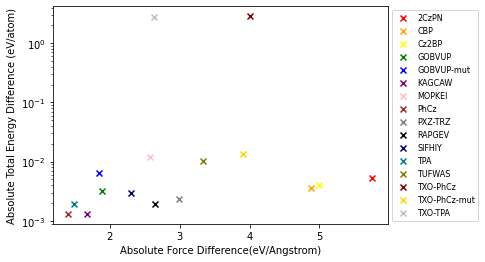

In [82]:
for i,mol in enumerate(molecules):
    plt.scatter(y=abs_EpA_diff[i],x=abs_f_diff[i],label=mol,marker='x',color=color_names[i])
    
plt.ylabel('Absolute Total Energy Difference (eV/atom)')
plt.xlabel('Absolute Force Difference(eV/Angstrom)')
# plt.xscale('log')
plt.yscale('log')
legend = plt.legend(bbox_to_anchor=(1, 1),prop={'size': 8})
plt.savefig("scatter_DFTvMMFF94_abs_EvpAvsF.png",dpi=img_dpi,bbox_inches='tight')
plt.show()

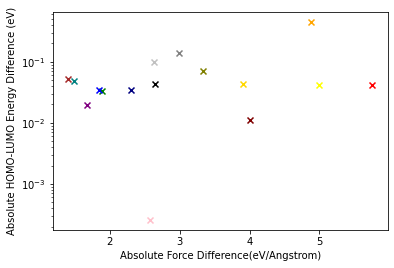

In [83]:
for i,mol in enumerate(molecules):
    plt.scatter(y=abs_HL_diff[i],x=abs_f_diff[i],label=mol,marker='x',color=color_names[i])
    
plt.ylabel('Absolute HOMO-LUMO Energy Difference (eV)')
plt.xlabel('Absolute Force Difference(eV/Angstrom)')
# plt.xscale('log')
plt.yscale('log')
# plt.legend(bbox_to_anchor=(1.5, 1),prop={'size': 8})
# plt.savefig("scatter_DFT_MMFF94_EvpA.png",dpi=img_dpi)
plt.savefig("scatter_DFTvMMFF94_abs_HLvsF.png",dpi=img_dpi)
plt.show()

Mean absolute position deviation

`mad = median(abs(a - median(a)))`

$MAD_{i,j,k}=\sum_{n}^{m}{|a_{i,j,k}-b_{i,j,k}|}$ where $n$ and $m$ are atoms, $a$ BigDFT-relaxed coordinates, $b$ MMFF94-relaxed coordinates, $i,j,k$ represents $x,y,z$ coordinates.

In [84]:
df_SP_DFT_calculations = pkl.load(open("../df_SP_DFT_calculations.pkl",'rb'))
df_SP_DFT_calculations

Mol_names                                    log file      HOMO  \
0     TXO-PhCz_2770  log-TXO-PhCz_2770_PBE_MMFF94_S0_cubic.yaml -5.206255   
1     TXO-PhCz_1650  log-TXO-PhCz_1650_PBE_MMFF94_S0_cubic.yaml -5.238605   
2      TXO-TPA_1486   log-TXO-TPA_1486_PBE_MMFF94_S0_cubic.yaml -5.944606   
3       GOBVUP_1858    log-GOBVUP_1858_PBE_MMFF94_S0_cubic.yaml -3.970825   
4       TUFWAS_1060    log-TUFWAS_1060_PBE_MMFF94_S0_cubic.yaml -3.521615   
...             ...                                         ...       ...   
1392     GOBVUP_196     log-GOBVUP_196_PBE_MMFF94_S0_cubic.yaml -4.527896   
1393     GOBVUP_854     log-GOBVUP_854_PBE_MMFF94_S0_cubic.yaml -4.381539   
1394   TXO-TPA_2069   log-TXO-TPA_2069_PBE_MMFF94_S0_cubic.yaml -5.570298   
1395   TXO-TPA_1372   log-TXO-TPA_1372_PBE_MMFF94_S0_cubic.yaml -6.053373   
1396     GOBVUP_494     log-GOBVUP_494_PBE_MMFF94_S0_cubic.yaml -4.046904   

          LUMO  LUMO-HOMO     Force  Total Energy per atom (eV/atom)   shell  
0    -3.551402   1.654853  0.112448                      -145.985557  closed  
1    -4.817694   0.420911  0.165944                      -144.228871    open  
2    -3.484950   2.459656  0.065933                      -145.046496  closed  
3    -3.330399   0.640426  0.054005                      -179.416348  closed  
4    -2.350833   1.170781  0.171337                      -147.149397  closed  
...        ...        ...       ...                              ...     ...  
1392 -3.305856   1.222040  0.145270                      -179.191853    open  
1393 -3.359973   1.021566  0.149764                      -171.533305  closed  
1394 -5.545090   0.025209  0.227163                      -147.975439    open  
1395 -5.742214   0.311159  0.089158                      -165.704356    open  
1396 -3.369292   0.677613  0.088424                      -184.374455    open  

[1370 rows x 8 columns]

In [85]:
final_calcs_data = pkl.load(open("../final_calculations.pkl",'rb'))
pd.DataFrame(final_calcs_data)

molecule             S0      HOMO      LUMO  LUMO-HOMO        S1  \
0   PXZ-TRZ_2078 -217085.425910 -4.349501 -3.368642   0.980858  1.999585   
1    PXZ-TRZ_583 -200396.054682 -4.405191 -3.064382   1.340809  2.179715   
2    GOBVUP_2026 -162106.218867 -5.253527 -2.733965   2.519562  2.693584   
3    GOBVUP_1838 -159625.747061 -4.708494 -2.469418   2.239076  2.328029   
4    TUFWAS_1073 -180821.898973 -4.000742 -2.592289   1.408453  1.499304   
..           ...            ...       ...       ...        ...       ...   
87    TUFWAS_599 -180297.971940 -3.896981 -3.152410   0.744571  0.823819   
88   TUFWAS_2190 -150633.784547 -3.965650 -2.480252   1.485398  1.622028   
89  TXO-PhCz_426 -202168.425063 -5.264382 -3.292159   1.972224  2.606990   
90    TUFWAS_818 -163517.649794 -3.921746 -2.574795   1.346951  1.422821   
91   GOBVUP_1847 -176647.078448 -4.235904 -2.517689   1.718215  1.826833   

          T1  S0_Note S1_Note T1_Note  
0   1.969038      NaN     NaN     NaN  
1   2.147526      NaN     NaN     NaN  
2   2.652459      NaN     NaN     NaN  
3   2.256349      NaN     NaN     NaN  
4   1.445142      NaN     NaN     NaN  
..       ...      ...     ...     ...  
87  0.602653      NaN     NaN     NaN  
88  1.561718      NaN     NaN     NaN  
89  2.526491      NaN     NaN     NaN  
90  1.370818      NaN     NaN     NaN  
91  1.765180      NaN     NaN     NaN  

[92 rows x 10 columns]

In [86]:
compare_data = {}
compare_data['molecules'] = []
compare_data['HOMO-LUMO_DFT'] = []
compare_data['HOMO-LUMO_MMFF94'] = []
for i,mol in enumerate(final_calcs_data['molecule']):
    
    compare_data['HOMO-LUMO_DFT'].append(final_calcs_data['LUMO-HOMO'][i])
    compare_data['molecules'].append(mol)
    for j,mol_i in enumerate(df_SP_DFT_calculations.reset_index(drop=True)['Mol_names']):
        if mol == mol_i:
# #             compare_data['molecules'].append(mol)
#             print(j)
            compare_data['HOMO-LUMO_MMFF94'].append(df_SP_DFT_calculations.reset_index(drop=True)['LUMO-HOMO'][j])

1246
47
978
880
1111
92
875
1333
97
1011
893
989
535
619
366
966
1091
1078
1142
1318
1196
276
401
888
482
541
675
307
1311
328
194
279
164
152
912
929
386
579
905
1260
817
815
917
590
1131
200
706
354
243
1108
1090
642
333
1357
1031
316
408
182
13
295
1024
7
60
789
724
730
999
578
1106
765
964
810
45
1133
894
87
124
296
232
1160
287
1227
784
1264
520
869
15
752
475
804
51
493


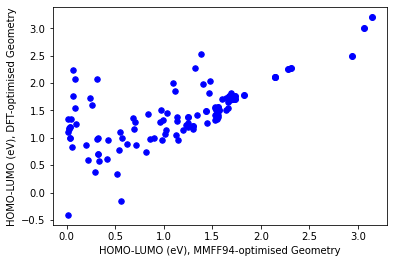

In [104]:
pd.DataFrame(compare_data).plot.scatter(x='HOMO-LUMO_MMFF94',y='HOMO-LUMO_DFT',marker='o',color='b',s=30)
for i,mol in enumerate(molecules):
    y = new_df.query("Geopt_Method =='BigDFT'").query("molecule ==@mol")['LUMO-HOMO'].values[0]
    x = new_df.query("Geopt_Method =='MMFF94'").query("molecule ==@mol")['LUMO-HOMO'].values[0]
    abs_HL_diff.append(abs(y-x))
    plt.plot(x,y,marker='o',color='b')#,label=mol,color=color_names[i])
    
plt.xlabel('HOMO-LUMO (eV), MMFF94-optimised Geometry')
plt.ylabel('HOMO-LUMO (eV), DFT-optimised Geometry')
plt.savefig("scatter_DFTvMMFF94_HL.png",dpi=img_dpi,bbox_inches='tight')
plt.show()

In [16]:
# def mad(arr, axis=None, keepdims=True):
#     median = np.median(arr, axis=axis, keepdims=True)
#     mad = np.median(np.abs(arr-median),axis=axis, keepdims=keepdims)
#     return mad

In [17]:
data_pos = {}
data_pos['Molecule'] = []
data_pos['MAD of position'] = []
# data_pos['MAD of position x (angstrom)'] = []
# data_pos['MAD of position y (angstrom)'] = []
# data_pos['MAD of position z (angstrom)'] = []
for file in os.listdir('BigDFT_geopt_files'):
    if 'xyz' in file:        
        
        bigdft_xyz = file.replace('final_','').replace('_PBE_s0xyz_cubic.xyz','')
        name = bigdft_xyz
   
        for file2 in os.listdir('MMFF94_geopt_files'):
            
            if bigdft_xyz == file2.replace('_MMFF94_geopt.xyz',''):
   
                xyz_text = []
                
           # Reading BigDFT xyz files
                with open(file,'r') as f:
                    
                    copy=False
                    
                    for line in f:
                        if line.startswith('free'):
                            copy=True
                        elif line.strip().endswith('forces'):
                            copy=False
                        elif copy:
                            xyz_text.append(line.split()[1:][0:3])
                
#                 calculate MAD 
                xyz_pos = np.array(xyz_text).astype(np.float)
                bg_dft_pos = xyz_pos
            
                method = 'BigDFT'
            

                xyz_text = []
                    
                # Reading MMFF xyz files         
                with open(file2,'r') as f:
                    
                    copy=False
                    
                    for line in f:
                        if line.startswith('free'):
                            copy=True
                        elif copy:
                            xyz_text.append(line.split()[1:])
                            
#                 calculated MAD
                xyz_pos = np.array(xyz_text).astype(np.float)
                ff_dft_pos = xyz_pos
                
                method = 'MMFF94'
                data_pos['Molecule'].append(name)
                
#                 MAD = sum(abs(bg_dft_pos - ff_dft_pos))
                MAD = abs( sum(sum(bg_dft_pos))-sum(sum(ff_dft_pos)))
                print MAD, sum(sum(bg_dft_pos)), sum(sum(ff_dft_pos))
                
#                 data_pos['MAD of position x (angstrom)'].append(MAD[0])
#                 data_pos['MAD of position y (angstrom)'].append(MAD[1])
#                 data_pos['MAD of position z (angstrom)'].append(MAD[2])
                data_pos['MAD of position'].append(MAD)

SyntaxError: invalid syntax (<ipython-input-17-a5d1fe0018ed>, line 61)

In [ ]:
df_pos = pd.DataFrame(data_pos)
df_pos

In [ ]:
# plt.figure(figsize=(4,4),dpi=1)

# matplotlib.rcParams.update({'font.size': 12})

# y_BigDFT = []
# x_MMFF94 = []

# for i, mol in enumerate(df_pos_BigDFT["Molecule"]):
#     for j, mol2 in enumerate(df_pos_MMFF94["Molecule"]):
#         if mol == mol2:
# #             print mol, mol2, i,j, df_BigDFT["LUMO-HOMO"][i], df_MMFF94["LUMO-HOMO"][j]
            
#             y_BigDFT.append(df_pos_BigDFT["MAD of position (angstrom)"][i])
#             x_MMFF94.append(df_pos_MMFF94["MAD of position (angstrom)"][j])
            
#             plt.plot(df_pos_MMFF94["MAD of position (angstrom)"][j],df_pos_BigDFT["MAD of position (angstrom)"][i],linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# # x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# # x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


# plt.ylabel('BigDFT-relaxed MAD of position (angstrom)')
# plt.xlabel('MMFF94-relaxed MAD of position (angstrom)')

# x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
# x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

# y_min = x_min
# y_max = x_max

# lims = [[x_min,y_min],[x_max,y_max]]

# plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
# plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks(np.arange(0.65, 3, .5))
# plt.yticks(np.arange(0.65, 3, .5))

            
# plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 6})
# plt.show()

In [ ]:
plt.figure(figsize=(4,4),dpi=1).tight_layout

matplotlib.rcParams.update({'font.size': 12})

for i, mol in enumerate(df_pos["Molecule"]):
#     list = abs([df_pos["MAD of position x (angstrom)"][i], df_pos["MAD of position y (angstrom)"][i], df_pos["MAD of position z (angstrom)"][i]])
#     plt.plot([1,2,3],list,linestyle='none',marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)
    plt.scatter(i,df_pos['MAD of position'][i],marker=marker_reset.next(),label=mol,color=colors[i],alpha=0.5)

# x_min = min([min(list(df_BigDFT['LUMO-HOMO'].values)),min(list(df_MMFF94['LUMO-HOMO'].values))])-0.05
# x_max = max([max(list(df_BigDFT['LUMO-HOMO'].values)),max(list(df_MMFF94['LUMO-HOMO'].values))])+0.05


plt.ylabel('MAD of positions (angstrom)')
# plt.xlabel('MMFF94-relaxed MAD of position (angstrom)')

# x_min = min([min(list(y_BigDFT)),min(list(x_MMFF94))])-0.05
# x_max = max([max(list(y_BigDFT)),max(list(x_MMFF94))])+0.05

# y_min = x_min
# y_max = x_max

# lims = [[x_min,y_min],[x_max,y_max]]

# plt.plot(lims, lims, 'k--', alpha=1,zorder=0,linewidth=0.6)
# plt.grid(True, color = "grey", linewidth = ".5", linestyle = "-")

# plt.xlim([x_min,x_max])
# plt.ylim([y_min,y_max])
          
# plt.xticks([1,2,3])
# plt.yticks(np.arange(0.65, 3, .5))

# plt.yscale('log')            
# plt.legend(bbox_to_anchor=(1.01, 1),prop={'size': 6})
plt.show()